# **Data Hackers Challenge - 2025**

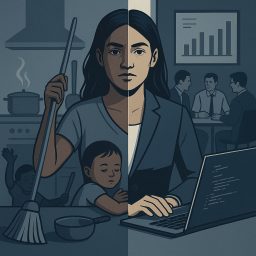
(imagem gerada por IA)

# **Mulheres em dados: entre a tecnologia e a dupla jornada**

Milhares de mulheres que atuam no setor de tecnologia e dados no Brasil enfrentam um grande desafio: profissionais altamente qualificadas, mas que carregam a dupla jornada invisível de trabalho doméstico e emocional.

De acordo com a Pesquisa Nacional por Amostra de Domicílios Contínua (PNAD), realizada pelo Instituto Brasileiro de Geografia e Estatística (IBGE), mulheres gastam cerca de 10 horas semanais a mais em responsabilidades domésticas. Esse tempo reduz a disponibilidade para estudos, trabalho, networking e descanso. 

Por trás de gráficos e algoritmos, há uma realidade pouco debatida: a sobrecarga feminina no setor de tecnologia. Apesar de representarem mais da metade da população brasileira, as mulheres ainda são minoria nessa área e, quando presentes, enfrentam obstáculos adicionais à sua permanência, crescimento e reconhecimento. Além disso, a desigualdade pode se manifestar no ritmo de progressão de carreira, na visibilidade das ideias, nas oportunidades e na remuneração.

Este trabalho busca analisar o que os dashboards sozinhos não mostram: como o gênero influencia a vivência profissional das mulheres na área de dados, e de que forma as tarefas invisíveis (como responsabilidades domésticas e de cuidado com outras pessoas) impactam sua disponibilidade, voz, salário e crescimento na carreira em um setor que, por natureza, valoriza a objetividade, mas nem sempre enxerga as realidades subjetivas por trás dos números.

A partir dos dados disponibilizados, serão exploradas algumas questões, como:
1. Progressão de carreira:
   - Mulheres com mais tempo de experiência estão em cargos equivalentes aos dos homens?
   - Mulheres têm menos oportunidades de promoção mesmo com tempo de carreira semelhante?
2. Remuneração e conhecimento:
   - Mesmo com a mesma formação e cargo, mulheres recebem salários menores?
   - Mulheres em cargos mais baixos sentem que suas ideias são menos valorizadas pelas equipes?
3. Satisfação e Permanência:
   - O impacto percebido por ser mulher se relaciona com menor satisfação no trabalho e desejo de sair?
   - Trabalhar presencialmente afeta mais negativamente a experiência profissional das mulheres?
   - Mulheres que atuam em modelos não flexíveis têm maior intenção de mudar de emprego?
4. Preferência e Tomada de decisão:
   -  Mulheres demonstram preferência maior por trabalho remoto ou híbrido em comparação ao presencial?
   -  A busca por flexibilidade é mais citada por mulheres como critério para aceitar um emprego?
   -  Mulheres têm menos acesso ao modelo de trabalho que preferem?

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'notebook_connected'
#comentar as duas ultimas linhas do import caso for rodar no kaggle editor

pd.set_option('display.max_columns', 500)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/state-of-data-brazil-20242025/Final Dataset - State of Data 2024 - Kaggle - df_survey_2024.csv


In [2]:
df = pd.read_csv('/kaggle/input/state-of-data-brazil-20242025/Final Dataset - State of Data 2024 - Kaggle - df_survey_2024.csv', low_memory=False)

OBS.: Como as análises serão feitas em comparação da jornada de uma pessoa declarada do gênero Feminino x Masculino, serão filtrados apenas registros com essas declarações. 

In [3]:
df = df[(df['1.b_genero'] == 'Feminino') | (df['1.b_genero'] == 'Masculino')]

## **Progressão de Carreira**

### **Mulheres com mais tempo de experiência estão em cargos equivalentes aos dos homens?**
Objetivo: identificar se mulheres progridem mais lentamente na carreira, mesmo com tempo de experiência semelhante

In [4]:
def criar_colunas_categoricas_ordenadas(df, ordem, coluna_original):
    df[f'{coluna_original}_ordinal'] = pd.Categorical(
        df[coluna_original],
        categories=ordem,
        ordered=True
    )

    df[f'{coluna_original}_ordinal'] = df[f'{coluna_original}_ordinal'].cat.codes

    return df

In [5]:
df['2.r_modelo_de_trabalho_atual'] = df['2.r_modelo_de_trabalho_atual'].replace(
    'Modelo híbrido flexível (o funcionário tem liberdade para escolher quando estar no escritório presencialmente)',
    'Modelo híbrido flexível'
)

df['2.s_modelo_de_trabalho_ideal'] = df['2.s_modelo_de_trabalho_ideal'].replace(
    'Modelo híbrido flexível (o funcionário tem liberdade para escolher quando estar no escritório presencialmente)',
    'Modelo híbrido flexível'
)

In [6]:
ordem_experiencia = [
    "Não tenho experiência na área de dados",
    "Menos de 1 ano",
    "de 1 a 2 anos",
    "de 3 a 4 anos",
    "de 5 a 6 anos",
    "de 7 a 10 anos",
    "Mais de 10 anos"
]

ordem_nivel = [
    "Júnior",
    "Pleno",
    "Sênior"
]

ordem_genero = [
    'Feminino',
    'Masculino'
]

all_labels = {
    '1.b_genero': 'Gênero',
    'percentual': 'Percentual',
    'percentual_formatado': 'Percentual',
    '2.r_modelo_de_trabalho_atual': 'Modelo de trabalho atual',
    '2.s_modelo_de_trabalho_ideal': 'Modelo de trabalho ideal',
    '2.o.4_Flexibilidade de trabalho remoto': 'Considera flexibilidade importante?',
    'Qtd pessoas': 'Número de pessoas',
    '2.k_satisfeito_atualmente': 'Está satisfeita(o)?',
    '1.e.3_Sim, devido a minha identidade de gênero': 'Relata impacto por ser mulher',
    '2.n_planos_de_mudar_de_emprego_6m': 'Quer mudar de emprego?',
    '2.g_nivel': 'Nível do Cargo',
    '1.f.7_Atenção dada pelas pessoas diante das minhas opiniões e ideias': 'As pessoas dão atenção para minhas opiniões e ideias?',
    '2.h_faixa_salarial': 'Faixa Salarial',
    '1.l_nivel_de_ensino': 'Nível de ensino',
    '1.f.4_Oportunidades de progressão de carreira': 'Percepção de crescimento',
    '2.i_tempo_de_experiencia_em_dados': 'Tempo na área',
}

In [7]:
df['1.f.4_Oportunidades de progressão de carreira'] = df['1.f.4_Oportunidades de progressão de carreira'].map({0: 'Não',1: 'Sim'})
df['2.k_satisfeito_atualmente'] = df['2.k_satisfeito_atualmente'].map({False: 'Não',True: 'Sim'})
df['1.f.7_Atenção dada pelas pessoas diante das minhas opiniões e ideias'] = df['1.f.7_Atenção dada pelas pessoas diante das minhas opiniões e ideias'].map({0: 'Não',1: 'Sim'})
df['2.o.4_Flexibilidade de trabalho remoto'] = df['2.o.4_Flexibilidade de trabalho remoto'].map({0: 'Não',1: 'Sim'})

In [8]:
df = criar_colunas_categoricas_ordenadas(df, ordem_experiencia, '2.i_tempo_de_experiencia_em_dados')
df = criar_colunas_categoricas_ordenadas(df, ordem_nivel, '2.g_nivel')
q1 = df[df['2.i_tempo_de_experiencia_em_dados_ordinal'] > 2] #Deixando apenas dados a partir de 3-4 anos

OBS.: Como existem mais respondentes do gênero masculino em comparação com o gênero feminino, a análise será feita utilizando os valores percentuais ao invés da quantidade absoluta. 

In [9]:
def calcular_percentual(df, cols_to_group, col_to_calculate):
    if(cols_to_group != []):
        total_agrupado = df.groupby(cols_to_group)[col_to_calculate].transform('sum')
    else:
        total_agrupado = df[col_to_calculate].sum()
    df['percentual'] = 100 * round((df[col_to_calculate] / total_agrupado),4)
    df['percentual_formatado'] = df['percentual'].apply(lambda x: f"{x:.2f} %".replace('.', ','))

    return df

In [10]:
contagem = q1.groupby(['1.b_genero', '2.g_nivel', '2.i_tempo_de_experiencia_em_dados']).size().reset_index(name='contagem')
contagem = calcular_percentual(contagem, ['1.b_genero','2.i_tempo_de_experiencia_em_dados',], 'contagem')

fig = px.bar(
    contagem,
    x='2.g_nivel',
    y='percentual', 
    color='1.b_genero', 
    color_discrete_map={
        'Feminino': '#FF69B4',
        'Masculino': '#1E88E5'
    },
    barmode='group',
    title='Nível do cargo por Gênero e Tempo de Experiência na área',
    category_orders={'2.g_nivel': ordem_nivel, '2.i_tempo_de_experiencia_em_dados': ordem_experiencia[3:]}, 
    facet_col='2.i_tempo_de_experiencia_em_dados',
    facet_col_wrap=2,
    labels=all_labels,
    text='percentual_formatado'
)

fig.update_yaxes(
    rangemode='tozero',
    showgrid=True,  
)

fig.update_layout(height=1000, autosize=True)

fig.show()

#### Considerações:

1. É possível observar no gráfico que a distribuição entre homens e mulheres no cargo "Sênior" somente se equipara para pessoas com mais de 10 anos de experiência, o que pode indicar uma progressão mais lenta de carreira para as mulheres. Diferenças em pontos percentuais: 
    - de 3 a 4 anos: 6,53 p.p.
    - de 5 a 6 anos: 5,52 p.p.
    - de 7 a 10 anos: 9,14 p.p.
    - mais de 10 anos: 0,55 p.p.
2. Para todos os níveis de experiência, as mulheres tem os maiores percentuais no cargo "Pleno", o que pode indicar um avanço mais cauteloso ou limitado. Além disso, para um alto tempo de experiência ainda existem mulheres no cargo "Júnior", sendo 0,77% das mulheres com experiência de 7 a 10 anos e 0,96% das mulheres com mais de 10 anos de experiência. 
3. Homens avançam mais cedo para o cargo "Sênior": com 5 a 6 anos de experiência, 75,97% deles já estão como Sênior e para os demais tempos de experiência superiores, esse também é o cargo predominante.


### **Mulheres têm menos oportunidades de promoção mesmo com tempo de carreira semelhante?**
Objetivo: identificar se mulheres enfrentam barreiras para promoção ao longo da carreira, mesmo com tempo de experiência semelhante ao dos homens

In [11]:
contagem = df.groupby(['2.i_tempo_de_experiencia_em_dados', '1.b_genero', '1.f.4_Oportunidades de progressão de carreira']).size().reset_index(name='contagem')
contagem = calcular_percentual(contagem, ['2.i_tempo_de_experiencia_em_dados','1.b_genero'], 'contagem')

fig = px.bar(
    contagem,
    x='2.i_tempo_de_experiencia_em_dados',
    y='percentual',
    color='1.f.4_Oportunidades de progressão de carreira',
    facet_col='1.b_genero',
    facet_col_wrap=1,
    barmode='stack',
    title='Percepção de oportunidade de promoção por Gênero e Tempo de Experiência',
    color_discrete_map={
        'Sim': '#81C784',
        'Não': '#E57373'
    },
    labels=all_labels,
    category_orders={'2.i_tempo_de_experiencia_em_dados': ordem_experiencia}, 
    text='percentual_formatado',

)

fig.update_layout(height=1000, autosize=True)

fig.show()

#### Considerações:

1. No geral, a percepção de oportunidades de progressão de carreira para homens é inferior a percepção das mulheres.

In [12]:
contagem = df.groupby(['2.g_nivel', '1.b_genero', '1.f.4_Oportunidades de progressão de carreira']).size().reset_index(name='contagem')
contagem = calcular_percentual(contagem, ['2.g_nivel','1.b_genero'], 'contagem')

fig = px.bar(
    contagem,
    x='2.g_nivel',
    y='percentual',
    color='1.f.4_Oportunidades de progressão de carreira',
    facet_col='1.b_genero',
    facet_col_wrap=1,
    barmode='stack',
    title='Percepção de oportunidade de promoção por Gênero e Cargo',
    color_discrete_map={
        'Sim': '#81C784',
        'Não': '#E57373'
    },
    labels=all_labels,
    category_orders={'2.g_nivel': ordem_nivel}, 
    text='percentual_formatado'
)

fig.update_layout(height=1000, autosize=True)
fig.show()

#### Considerações:

1. A percepção de oportunidades de progressão de carreira aumenta conforme a senioridade do cargo para ambos os gêneros.
   
## **Remuneração e conhecimento**
### **Mesmo com a mesma formação e cargo, mulheres recebem salários menores?**
Objetivo: verificar se há disparidade salarial entre homens e mulheres que ocupam o mesmo cargo e possuem o mesmo nível de formação

In [13]:
ordem_faixa_salarial = [
    "Menos de R$ 1.000/mês",
    "de R$ 1.001/mês a R$ 2.000/mês",
    "de R$ 2.001/mês a R$ 3.000/mês",
    "de R$ 3.001/mês a R$ 4.000/mês",
    "de R$ 4.001/mês a R$ 6.000/mês",
    "de R$ 6.001/mês a R$ 8.000/mês",
    "de R$ 8.001/mês a R$ 12.000/mês",
    "de R$ 12.001/mês a R$ 16.000/mês",
    "de R$ 16.001/mês a R$ 20.000/mês",
    "de R$ 20.001/mês a R$ 25.000/mês",
    "de R$ 25.001/mês a R$ 30.000/mês",
    "de R$ 30.001/mês a R$ 40.000/mês",
    "Acima de R$ 40.001/mês"
]

ordem_nivel_ensino = [
    "Não tenho graduação formal",
    "Estudante de Graduação",
    "Graduação/Bacharelado",
    "Pós-graduação",
    "Mestrado",
    "Doutorado ou Phd"
]

In [14]:
df = criar_colunas_categoricas_ordenadas(df, ordem_faixa_salarial, '2.h_faixa_salarial')
df = criar_colunas_categoricas_ordenadas(df, ordem_nivel_ensino, '1.l_nivel_de_ensino')

In [15]:
q2 = df[df['1.l_nivel_de_ensino'] != 'Prefiro não informar'] 

In [16]:
fig = px.violin(
    q2,
    x='2.g_nivel',
    y='2.h_faixa_salarial',
    color='1.b_genero',
    color_discrete_map={
        'Feminino': '#FF69B4',
        'Masculino': '#1E88E5'
    },
    facet_col='1.l_nivel_de_ensino',
    facet_col_wrap=2,
    box=False,
    points='all',
    category_orders={
        '2.g_nivel': ordem_nivel,
        '2.h_faixa_salarial': ordem_faixa_salarial[::-1],
        '1.l_nivel_de_ensino': ordem_nivel_ensino
    },
    labels={
        '1.b_genero': 'Gênero',
        '2.g_nivel': 'Nível do Cargo',
        '2.h_faixa_salarial': 'Faixa Salarial',
        '1.l_nivel_de_ensino': 'Nível de ensino'
    },
    title='Distribuição Salarial por Gênero, Cargo e Formação'
)

fig.update_layout(height=1250, autosize=True)
fig.show()

#### Considerações:

1. Em quase todos os níveis e cargos, os homens apresentam maior concentração em faixas salariais superiores do que as mulheres.
2. Para os cargos "Pleno" e "Sênior", existe uma distribuição mais alta e dispersa para os homens e uma concentração das mulheres em faixas intermediárias ou inferiores.
3. Mesmo com Doutorado ou Phd, existem poucas mulheres nas faixas acima de R$ 16.000 por mês, enquanto existem homens em todas as faixas salariais superiores para o cargo "Sênior", por exemplo.  

### **Mulheres em cargos mais baixos sentem que suas ideias são menos valorizadas pelas equipes?**
Objetivo: Verificar se, em cargos de menor senioridade, mulheres relatam mais frequentemente que suas ideias não recebem atenção, em comparação com homens no mesmo nível.

In [17]:
contagem = df.groupby([
    '2.g_nivel',
    '1.b_genero',
    '1.f.7_Atenção dada pelas pessoas diante das minhas opiniões e ideias'
]).size().reset_index(name='contagem')

contagem = calcular_percentual(contagem, ['2.g_nivel','1.b_genero'], 'contagem')

fig = px.bar(
    contagem,
    x='2.g_nivel',
    y='percentual',
    color='1.f.7_Atenção dada pelas pessoas diante das minhas opiniões e ideias',
    facet_col='1.b_genero',
    facet_col_wrap=1,
    barmode='relative',
    title='Percepção de atenção às ideias por Cargo e Gênero',
    color_discrete_map={
        'Sim': '#81C784',
        'Não': '#E57373'
    },
    labels=all_labels,
    text='percentual_formatado'
)
fig.update_layout(height=750, autosize=True)
fig.show()

#### Considerações:

1. As mulheres percebem maior atenção às suas opniões e ideias em todos os cargos.
2. Os homens do nível "Júnior" possuem o maior percentual de não atenção às ideias.


## **Satisfação e permanência**

### **O impacto percebido por ser mulher se relaciona com menor satisfação no trabalho e desejo de sair?**
Objetivo: Investigar se as mulheres que relatam sentir impacto negativo por serem mulheres no ambiente de trabalho também estão mais insatisfeitas com o trabalho atual e têm mais intenção de mudar de emprego

In [18]:
q4 = df[(df['1.b_genero'] == 'Feminino') & (df['1.e.3_Sim, devido a minha identidade de gênero'] == 1.0)]

df_satisfacao = q4.groupby(['1.e.3_Sim, devido a minha identidade de gênero', '2.k_satisfeito_atualmente']).size().reset_index(name='Qtd')
df_satisfacao = calcular_percentual(df_satisfacao, [], 'Qtd')

df_mudanca = q4.groupby(['1.e.3_Sim, devido a minha identidade de gênero', '2.n_planos_de_mudar_de_emprego_6m']).size().reset_index(name='Qtd')
df_mudanca = calcular_percentual(df_mudanca, [], 'Qtd')

In [19]:
fig1 = px.bar(
    df_satisfacao,
    x='2.k_satisfeito_atualmente',
    y='percentual',
    color='2.k_satisfeito_atualmente',
    barmode='relative',
    title='Satisfação no trabalho x Percepção de impacto por ser mulher (entre mulheres)',
    color_discrete_map={
        'Sim': '#81C784',
        'Não': '#E57373'
    },
    labels=all_labels,
    text='percentual_formatado'
)
fig1.update_layout(height=500,  autosize=True)
fig1.show()

#### Considerações:

1. Entre as mulheres que percebem impacto no trabalho por serem mulheres, a maioria delas estão satisfeitas atualmente.

In [20]:
fig2 = px.bar(
    df_mudanca,
    x='2.n_planos_de_mudar_de_emprego_6m',
    y='percentual',
    color='2.n_planos_de_mudar_de_emprego_6m',
    barmode='relative',
    title='Desejo de mudança de emprego x Percepção de impacto por ser mulher (entre mulheres)',
    labels=all_labels,
    text='percentual_formatado',
    color_discrete_map={'Sim': '#E76F51', 'Não': '#2A9D8F'},
)

fig2.update_layout(height=750,  autosize=True)

fig2.show()

#### Considerações:

1. Entre as mulheres que percebem impacto no trabalho por conta do gênero, a maioria delas (65,81%) não estão buscando um novo emprego, sendo que 38,4% se consideram abertas a outras oportunidades e 27,41% não pretendem mudar de emprego nos próximos 6 meses.

### **Trabalhar presencialmente afeta mais negativamente a experiência profissional das mulheres?**
Objetivo: analisar se o modelo de trabalho presencial impacta mais negativamente a experiência profissional das mulheres em comparação aos homens

In [21]:
df_grouped = df.groupby([
    '2.r_modelo_de_trabalho_atual',
    '1.b_genero',
    '2.k_satisfeito_atualmente'
]).size().reset_index(name='contagem')

df_grouped = calcular_percentual(df_grouped, ['2.r_modelo_de_trabalho_atual','1.b_genero'], 'contagem')

fig = px.bar(
    df_grouped,
    x='2.r_modelo_de_trabalho_atual',
    y='percentual',
    color='2.k_satisfeito_atualmente',
    facet_col='1.b_genero',
    facet_col_wrap=1,
    barmode='relative',
    title='Satisfação no trabalho por modelo atual e gênero',
    color_discrete_map={
        'Sim': '#81C784',
        'Não': '#E57373'
    },
    labels=all_labels,
    text='percentual_formatado'
    
)

fig.update_layout(height=750, autosize=True)

fig.show()

#### Considerações:

1. O modelo 100% presencial apresenta a menor taxa de satisfação para ambos os gêneros
2. A segunda menor taxa de satisfação é o modelo híbrido com dias fixos, podendo indicar que a obrigatoriedade de presença em dias fixos ainda pode ser um entrave, especialmente para quem precisa de mais autonomia na agenda 
3. As maiores taxas de satisfação para as mulheres se encontram nos modelos 100% remoto (77,12% das mulheres que atuam nesse modelo estão satisfeitas) e modelo híbrido flexível (73,61%)

### **Mulheres que atuam em modelos não flexíveis têm maior intenção de mudar de emprego?**
Objetivo: investigar se a falta de flexibilidade no modelo de trabalho está associada a uma maior intenção de mudança de emprego entre as mulheres

In [22]:
df_grouped = df.groupby([
    '2.r_modelo_de_trabalho_atual',
    '1.b_genero',
    '2.n_planos_de_mudar_de_emprego_6m'
]).size().reset_index(name='contagem')

df_grouped = calcular_percentual(df_grouped, ['1.b_genero','2.r_modelo_de_trabalho_atual'], 'contagem')

fig = px.bar(
    df_grouped,
    x='2.r_modelo_de_trabalho_atual',
    y='percentual',
    color='2.n_planos_de_mudar_de_emprego_6m',
    facet_col='1.b_genero',
    facet_col_wrap=1,
    barmode='relative',
    title='Intenção de mudar de emprego por modelo atual e gênero',
    color_discrete_map={'Sim': '#E76F51', 'Não': '#2A9D8F'},
    labels=all_labels,
    text='percentual_formatado'
)

fig.update_layout(height=1200, autosize=True)
fig.show()

#### Considerações:

1. Pessoas que atuam no modelo 100% presencial estão associadas a maior intenção de mudança de emprego para ambos os gêneros. A rigidez do trabalho presencial pode estar ligada à insatisfação e rotatividade.

## **Preferência e tomada de decisão**
### **Mulheres demonstram preferência maior por trabalho remoto ou híbrido em comparação ao presencial?**
Objetivo: identificar se mulheres têm preferência mais acentuada por modelos de trabalho remoto ou híbrido em relação ao presencial

In [23]:
df_grouped = df.groupby([
    '2.s_modelo_de_trabalho_ideal',
    '1.b_genero'
]).size().reset_index(name='contagem')

df_grouped = calcular_percentual(df_grouped, ['1.b_genero'], 'contagem')

fig = px.bar(
    df_grouped,
    x='2.s_modelo_de_trabalho_ideal',
    y='percentual',
    color='1.b_genero',
    barmode='group',
    title='Modelo de trabalho ideal por gênero',
        color_discrete_map={
        'Feminino': '#FF69B4',
        'Masculino': '#1E88E5'
    },
    labels=all_labels,
    text='percentual_formatado'
)

fig1.update_layout(height=1000,  autosize=True)
fig.show()

#### Considerações:

1. Mais de metade das mulheres (53,42%) prefere o modelo 100% remoto.
2. Entre os homens, a preferência pelo modelo híbrido flexível é ligeiramente maior que a preferência pelo modelo remoto.
3. O modelo 100% presencial é o menos desejado por ambos os gêneros.
   
### **A busca por flexibilidade é mais citada por mulheres como critério para aceitar um emprego?**
Objetivo: analisar se a flexibilidade é um critério mais valorizado por mulheres do que por homens na decisão de aceitar uma proposta de emprego

In [24]:
df_grouped = df.groupby([
    '1.b_genero',
    '2.o.4_Flexibilidade de trabalho remoto'
]).size().reset_index(name='contagem')

df_grouped = calcular_percentual(df_grouped, ['1.b_genero'], 'contagem')

fig = px.bar(
    df_grouped,
    x='1.b_genero',
    y='percentual',
    color='2.o.4_Flexibilidade de trabalho remoto',
    barmode='relative',
    title='Flexibilidade como fator decisivo na escolha de emprego por gênero',
    color_discrete_map={
        'Sim': '#81C784',
        'Não': '#E57373'
    },
    labels=all_labels,
    text='percentual_formatado',
    category_orders={'1.b_genero': ordem_genero},
)

fig.update_layout(
    height=500,
    width=500
)
fig.show()

#### Considerações:

1. Mulheres valorizam mais a flexibilidade como critério decisivo para aceitar um emprego, reforçando a importância de políticas de trabalho que ofereçam liberdade de escolha.

### **Mulheres têm menos acesso ao modelo de trabalho que preferem?**
Objetivo: verificar se há discrepância entre o modelo de trabalho ideal e o modelo atual entre as mulheres, indicando menor acesso ao formato que preferem

In [25]:
contagem = df.groupby(['1.b_genero', '2.r_modelo_de_trabalho_atual', '2.s_modelo_de_trabalho_ideal',]).size().reset_index(name='contagem')
contagem = calcular_percentual(contagem, ['1.b_genero', '2.r_modelo_de_trabalho_atual', ], 'contagem')

fig = px.bar(
    contagem,
    x='2.s_modelo_de_trabalho_ideal',
    y='percentual', 
    color='1.b_genero', 
    barmode='group',
    category_orders={'2.g_nivel': ordem_nivel, '2.i_tempo_de_experiencia_em_dados': ordem_experiencia[3:]}, 
    facet_col='2.r_modelo_de_trabalho_atual',
    facet_col_wrap=1,
    title='Modelo de trabalho atual e ideal por gênero: comparativo entre mulheres e homens na área de tecnologia',
    labels=all_labels,
    text='percentual_formatado',
    color_discrete_map={
        'Feminino': '#FF69B4',
        'Masculino': '#1E88E5'
    },
)

fig.update_yaxes(
    rangemode='tozero',
    showgrid=True,  
)

fig.update_layout(height=1200, autosize=True)

fig.show()

#### Considerações:

1. Com exceção das pessoas que atualmente trabalham 100% remoto, ambos os gêneros têm preferência pelo modelo de trabalho híbrido flexível.
2. No geral, mulheres preferem mais o modelo 100% remoto do que os homens, podendo indicar que as mulheres veem nesse modelo uma forma de conciliar melhor o trabalho e tarefas domésticas, reforçando o peso da dupla jornada.
3. O trabalho 100% presencial é o menos desejado por ambos os gêneros

## **Considerações Finais**

Ao longo desta análise, foi possível levantar pontos que nos ajudam a refletir sobre como as desigualdades de gênero na área de dados vão além das métricas de salário e cargo. Mulheres, especialmente em fases mais avançadas da carreira, ainda enfrentam trajetórias mais lentas de progressão, permanecem concentradas em cargos intermediários e têm menor acesso a faixas salariais superiores, mesmo com o mesmo nível de formação. 


Ao mesmo tempo, as preferências mais fortes por modelos de trabalho flexíveis e a valorização da autonomia podem revelar os impactos da dupla jornada, em que o equilíbrio entre vida profissional e responsabilidades domésticas segue como desafio recorrente. Embora muitas mulheres declarem satisfação no trabalho atual e não estejam ativamente buscando novas oportunidades, isso pode estar relacionado a fatores como cultura da empresa ou flexibilidade oferecida e não necessariamente à ausência de barreiras.


Avançar em igualdade de gênero exige repensar não apenas estruturas de carreira, mas também políticas organizacionais que respeitem as múltiplas jornadas vividas pelas mulheres.

## **Referências**

- Pesquisa Nacional por Amostra de Domicílios Contínua (PNAD) 2022 - Outras formas de trabalho (https://www.ibge.gov.br/estatisticas/sociais/trabalho/17270-pnad-continua.html?edicao=37526&t=resultados)
